# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [2]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 11.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install tweepy

     |████████████████████████████████| 147 kB 20.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [6]:
client = MongoClient(mongod_connect)
db = client.gp29 # use or create a database named gp29
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [7]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [8]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [9]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1328113730253676545
1328113730375327749
1328113730375258112
1328113730652045312
1328113730559893504
1328113730819743744
1328113731239284736
1328113731268714496
1328113731729903616
1328113731666989058
1328113731763519488
1328113731843354625
1328113732224905216
1328113732216643584
1328113732317290497
1328113732388438016
1328113732359245825
1328113732422152195
1328113732304637957
1328113732455641089
1328113732493352960
1328113732401176577
1328113732669624322
1328113732715749376
1328113732858175490
1328113732929536000
1328113732975783937
1328113732937867266
1328113733361684480
1328113733235773441
1328113733378433031
1328113733458161664
1328113733437100034
1328113733537832961
1328113733655138306
1328113733609119749
1328113733646868482
1328113733797773313
1328113733730766850
1328113734062133248
1328113734192033792
1328113734242459648
1328113734464712705
1328113734557069314
1328113734703861761
1328113734619951104
1328113734582030336
1328113734749986819
1328113734779330560
1328113734783434752


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 15 23:11:45 +0000 2020'
'Sun Nov 15 23:01:59 +0000 2020'
'Sun Nov 15 23:01:37 +0000 2020'
'Sun Nov 15 22:45:11 +0000 2020'
'Sun Nov 15 22:33:57 +0000 2020'
'Sun Nov 15 22:33:32 +0000 2020'
'Sun Nov 15 22:27:41 +0000 2020'
'Sun Nov 15 22:26:55 +0000 2020'
'Sun Nov 15 22:26:03 +0000 2020'
'Sun Nov 15 22:21:44 +0000 2020'
'Sun Nov 15 22:18:59 +0000 2020'
'Sun Nov 15 22:12:12 +0000 2020'
'Sun Nov 15 22:08:55 +0000 2020'
'Sun Nov 15 22:06:31 +0000 2020'
'Sun Nov 15 22:06:01 +0000 2020'
'Sun Nov 15 22:05:31 +0000 2020'
'Sun Nov 15 22:01:46 +0000 2020'
'Sun Nov 15 22:00:51 +0000 2020'
'Sun Nov 15 21:57:50 +0000 2020'
'Sun Nov 15 21:57:22 +0000 2020'
'Sun Nov 15 21:56:42 +0000 2020'
'Sun Nov 15 21:56:37 +0000 2020'
'Sun Nov 15 21:56:06 +0000 2020'
'Sun Nov 15 21:55:33 +0000 2020'
'Sun Nov 15 21:55:03 +0000 2020'
'Sun Nov 15 21:54:32 +0000 2020'
'Sun Nov 15 21:53:55 +0000 2020'
'Sun Nov 15 21:51:14 +0000 2020'
'Sun Nov 15 21:50:41 +0000 2020'
'Sun Nov 15 21:45:56 +0000 2020'
'Sun Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 15 21:06:10 +0000 2020'
'Sun Nov 15 21:04:23 +0000 2020'
'Sun Nov 15 21:04:10 +0000 2020'
'Sun Nov 15 21:02:59 +0000 2020'
'Sun Nov 15 21:02:45 +0000 2020'
'Sun Nov 15 21:02:20 +0000 2020'
'Sun Nov 15 21:01:35 +0000 2020'
'Sun Nov 15 20:59:42 +0000 2020'
'Sun Nov 15 20:59:01 +0000 2020'
'Sun Nov 15 20:58:11 +0000 2020'
'Sun Nov 15 20:57:50 +0000 2020'
'Sun Nov 15 20:57:46 +0000 2020'
'Sun Nov 15 20:54:26 +0000 2020'
'Sun Nov 15 20:53:54 +0000 2020'
'Sun Nov 15 20:53:53 +0000 2020'
'Sun Nov 15 20:53:50 +0000 2020'
'Sun Nov 15 20:53:45 +0000 2020'
'Sun Nov 15 20:53:26 +0000 2020'
'Sun Nov 15 20:53:00 +0000 2020'
'Sun Nov 15 20:52:39 +0000 2020'
'Sun Nov 15 20:52:17 +0000 2020'
'Sun Nov 15 20:51:50 +0000 2020'
'Sun Nov 15 20:49:00 +0000 2020'
'Sun Nov 15 20:47:21 +0000 2020'
'Sun Nov 15 20:45:57 +0000 2020'
'Sun Nov 15 20:45:27 +0000 2020'
'Sun Nov 15 20:45:00 +0000 2020'
'Sun Nov 15 20:41:51 +0000 2020'
'Sun Nov 15 20:38:20 +0000 2020'
'Sun Nov 15 20:33:48 +0000 2020'
'Sun Nov 1

'Sun Nov 15 14:50:46 +0000 2020'
'Sun Nov 15 14:49:33 +0000 2020'
'Sun Nov 15 14:48:23 +0000 2020'
'Sun Nov 15 14:48:04 +0000 2020'
'Sun Nov 15 14:44:43 +0000 2020'
'Sun Nov 15 14:38:12 +0000 2020'
'Sun Nov 15 14:38:03 +0000 2020'
'Sun Nov 15 14:37:48 +0000 2020'
'Sun Nov 15 14:37:45 +0000 2020'
'Sun Nov 15 14:37:06 +0000 2020'
'Sun Nov 15 14:35:51 +0000 2020'
'Sun Nov 15 14:35:39 +0000 2020'
'Sun Nov 15 14:35:23 +0000 2020'
'Sun Nov 15 14:35:05 +0000 2020'
'Sun Nov 15 14:34:07 +0000 2020'
'Sun Nov 15 14:33:31 +0000 2020'
'Sun Nov 15 14:33:28 +0000 2020'
'Sun Nov 15 14:32:57 +0000 2020'
'Sun Nov 15 14:31:46 +0000 2020'
'Sun Nov 15 14:31:11 +0000 2020'
'Sun Nov 15 14:30:19 +0000 2020'
'Sun Nov 15 14:28:34 +0000 2020'
'Sun Nov 15 14:28:32 +0000 2020'
'Sun Nov 15 14:27:21 +0000 2020'
'Sun Nov 15 14:26:53 +0000 2020'
'Sun Nov 15 14:26:34 +0000 2020'
'Sun Nov 15 14:26:19 +0000 2020'
'Sun Nov 15 14:26:05 +0000 2020'
'Sun Nov 15 14:25:59 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

216029
174711


Create a text index and print the Tweets containing specific keywords. 

In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Jane West
text: Legal votes- not all votes just the legal votes.
----
name: Hugo
text: Vote by vote, box by box! ✊✊✊
----
name: Levigaming
text: @Rumrunner11 @dkm14 @JoeBiden @KamalaHarris Not popular votes. That's people's votes counted for the election not the popular vote
----
name: Danny
text: @BillOReilly No
Clinton got more votes in 2016, and Biden got more votes in this election. By more than 4 million votes.
----
name: JamesonLaw
text: RT @JamesonHalpern: What about all the sudden single vote ballots, ALL for Biden?  What about he reversal of 6,000 hacked votes from voting…
----
name: #AskWizkid #Election2020
text: RT @SierraRae1316: Like Obama said "voting is not about only voting for perfect person, it's about voting for a step forward."

Remember ne…
----
name: sarah8888
text: RT @vicksiern: @guypbenson WHO DO YOU THINK WON THE ELECTION WITH "LEGAL VOTES" not "illegal votes and corrupt software in voting machines…
----
name: Miss Mam
text: RT @vicksiern: @guypbens

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,filter_level,lang,timestamp_ms,display_text_range,retweeted_status,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries,metadata
0,5fa6edf5f7fcb3d0c96b6ab8,Sat Nov 07 18:56:47 +0000 2020,1325150222591406082,1325150222591406082,Legal votes- not all votes just the legal votes.,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,low,en,1604775407823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa6f2d7f7fcb3d0c96c5eed,Sat Nov 07 19:17:38 +0000 2020,1325155469095153664,1325155469095153664,"Vote by vote, box by box! ✊✊✊","<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,low,en,1604776658687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa6f45cf7fcb3d0c96caac6,Sat Nov 07 19:24:06 +0000 2020,1325157096866738176,1325157096866738176,@Rumrunner11 @dkm14 @JoeBiden @KamalaHarris No...,"<a href=""http://twitter.com/download/android"" ...",False,1.325150e+18,1325149846077009921,39539485.0,...,low,en,1604777046778,"[44, 130]",NaN,NaN,NaN,NaN,NaN,NaN
3,5fa6ef93f7fcb3d0c96bbb7c,Sat Nov 07 19:03:41 +0000 2020,1325151958659821568,1325151958659821568,@BillOReilly No\nClinton got more votes in 201...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.325122e+18,1325121652615651330,23970102.0,...,low,en,1604775821734,"[13, 120]",NaN,NaN,NaN,NaN,NaN,NaN
4,5fa6eeeaf7fcb3d0c96b9a96,Sat Nov 07 19:00:52 +0000 2020,1325151250342539265,1325151250342539265,RT @JamesonHalpern: What about all the sudden ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,low,en,1604775652858,NaN,{'created_at': 'Sat Nov 07 18:55:07 +0000 2020...,NaN,NaN,NaN,NaN,NaN
5,5fa6f629f7fcb3d0c96d04e8,Sat Nov 07 19:31:47 +0000 2020,1325159031183298562,1325159031183298562,"RT @SierraRae1316: Like Obama said ""voting is ...","<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,low,en,1604777507955,NaN,{'created_at': 'Sat Nov 07 19:27:21 +0000 2020...,NaN,NaN,NaN,NaN,NaN
6,5fa6f1f1f7fcb3d0c96c31e4,Sat Nov 07 19:13:47 +0000 2020,1325154500601024514,1325154500601024514,RT @vicksiern: @guypbenson WHO DO YOU THINK WO...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,low,en,1604776427780,NaN,{'created_at': 'Sat Nov 07 19:01:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN
7,5fa6f032f7fcb3d0c96bdab5,Sat Nov 07 19:06:21 +0000 2020,1325152629668909057,1325152629668909057,RT @vicksiern: @guypbenson WHO DO YOU THINK WO...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,low,en,1604775981715,NaN,{'created_at': 'Sat Nov 07 19:01:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN
8,5fa6efccf7fcb3d0c96bc6b1,Sat Nov 07 19:04:38 +0000 2020,1325152198435639297,1325152198435639297,RT @LLinWood: Georgia vote will be a truthful ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,low,en,1604775878901,NaN,{'created_at': 'Fri Nov 06 16:41:30 +0000 2020...,NaN,NaN,NaN,NaN,NaN
9,5fa6ef88f7fcb3d0c96bb979,Sat Nov 07 19:03:31 +0000 2020,1325151916465115137,1325151916465115137,RT @vicksiern: @guypbenson WHO DO YOU THINK WO...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,low,en,1604775811674,NaN,{'created_at': 'Sat Nov 07 19:01:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN


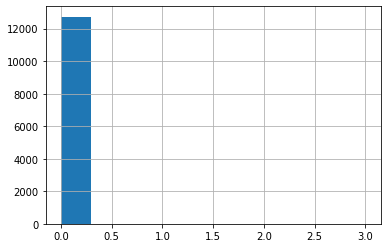

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count